In [1]:
from subpred.protein_go_datasets import get_transmembrane_transporter_dataset, get_stats

## Parameters

In [ ]:
ORGANISMS = [9606]  # athaliana 3702 yeast 559292 human 9606 ecoli 83333
GO_TERMS_CLASSES = [
    "chloride channel activity",
    "potassium channel activity",
]
IDENTITY_THRESHOLD = 70
TEST_NAME = "svc_human_chloridepotassium"
# TODO pathlib
FEATURES_FOLDER = "../data/tmp_data/"  # to share between environments
RESULTS_FOLDER = "../data/results/"
RECALCULATE_RESULTS = True  # TODO If false, use cached results, e.g. to create more plots

## Full dataset

In [3]:
# Get full dataset for stats. Dataset for analysis is created in cell below.
dataset_unfiltered = get_transmembrane_transporter_dataset( 
    organism_ids=ORGANISMS,
    swissprot_only=False,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=False,
    max_sequence_evidence_code=2,
    remove_proteins_without_gene_names=False,
)
get_stats(*dataset_unfiltered)

cd-hit: clustered 3874 sequences into 1029 clusters at threshold 50
cd-hit: clustered 3874 sequences into 1347 clusters at threshold 70
cd-hit: clustered 3874 sequences into 1774 clusters at threshold 90
cd-hit: clustered 3874 sequences into 3408 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence   protein_existence_evidence clustering                   
False              False         computational protein_level              50                       1   
                                                                          70                       1   
                                                                          90                       5   
                                                                          100                      9   
                                                                          None                    10   
                                               transcript_level           50                      54   
                                                                          70                      77   
                                                                          90                     152   
                                                                          100                    665   
                                                                          None                   771   
                                 experiment    transcript_level           50                       1   
                                                                          70                       1   
                                                                          90                       1   
                                                                          100                      2   
                                                                          None                     2   
                   True          computational protein_level              50                     142   
                                                                          70                     211   
                                                                          90                     419   
                                                                          100                   1031   
                                                                          None                  1175   
                                               transcript_level           50                      31   
                                                                          70                      46   
                                                                          90                     100   
                                                                          100                    501   
                                                                          None                   687   
                                 experiment    transcript_level           50                       1   
                                                                          70                       1   
                                                                          90                       2   
                                                                          100                      4   
                                                                          None                     5   
True               True          computational protein_level              50                     552   
                                                                          70                     741   
                                                                          90                     819   
                                                                          100                    919   
                                                                          None                   945   
                                               transcript_level           50                       6   
                                                                          70                      10   
                              

## Filtered Subset

In [4]:
dataset_organism = get_transmembrane_transporter_dataset(  # organism
    organism_ids=ORGANISMS,
    swissprot_only=True,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=True,
    max_sequence_evidence_code=1,
    remove_proteins_without_gene_names=True,
)
get_stats(*dataset_organism)

cd-hit: clustered 1121 sequences into 846 clusters at threshold 50
cd-hit: clustered 1121 sequences into 1039 clusters at threshold 70
cd-hit: clustered 1121 sequences into 1110 clusters at threshold 90
cd-hit: clustered 1121 sequences into 1118 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering                   
True               True          experiment  protein_level              50                     846   
                                                                        70                    1039   
                                                                        90                    1110   
                                                                        100                   1118   
                                                                        None                  1121   

                                                                                    n_terms  
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering           
True               True          experiment  protein_level              50              534  
                                                                        70              563  
                                                                        90              570  
                                                                        100             570  
                                                                        None            570

In [ ]:
from subpred.protein_go_datasets import count_children
display(count_children(dataset_organism=dataset_organism, go_term="monoatomic anion channel activity"))
count_children(dataset_organism=dataset_organism, go_term="monoatomic cation channel activity")

,Uniprot
go_term_ancestor,
amino acid transmembrane transporter activity,96
L-amino acid transmembrane transporter activity,59
neutral L-amino acid transmembrane transporter activity,39
amino acid:monoatomic cation symporter activity,27
basic amino acid transmembrane transporter activity,19
acidic amino acid transmembrane transporter activity,18
glutamate-gated receptor activity,17
gamma-aminobutyric acid transmembrane transporter activity,8
amino acid:monoatomic cation antiporter activity,5


## Subset

In [11]:
from subpred.dataset_filters import get_classification_subset
dataset_organism = get_classification_subset(dataset_full=dataset_organism, go_terms=GO_TERMS_CLASSES, remove_duplicates=True)

print("before clustering:")
dataset_organism[1].go_term_ancestor.value_counts()

before clustering:


go_term_ancestor
calcium channel activity      104
potassium channel activity     96
Name: count, dtype: int64

In [12]:
from subpred.dataset_filters import filter_no_3Di_available

dataset_organism = filter_no_3Di_available(dataset_organism)
dataset_organism[1].go_term_ancestor.value_counts()

go_term_ancestor
calcium channel activity      103
potassium channel activity     95
Name: count, dtype: int64

Clustering at 70%

In [13]:
from subpred.dataset_filters import cluster_sequences
dataset_organism = cluster_sequences(dataset_full=dataset_organism, identity_threshold=IDENTITY_THRESHOLD)
dataset_organism[1].go_term_ancestor.value_counts()

cd-hit: clustered 198 sequences into 184 clusters at threshold 70


go_term_ancestor
calcium channel activity      100
potassium channel activity     84
Name: count, dtype: int64

## Feature generation

In [14]:
from subpred.features import get_features
features_list, series_labels = get_features(dataset_full=dataset_organism)

2025-05-31 15:48:49.498725: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-31 15:48:49.504318: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748699329.509820   29849 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748699329.511680   29849 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-31 15:48:49.518262: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

PSSM for accession Q9HC24 was not found in tmp folder ../data/datasets/pssm/pssm_uniref50_1it, calling psiblast
PSSM for accession Q9HC24 was generated
PSSM for accession Q969X1 was not found in tmp folder ../data/datasets/pssm/pssm_uniref50_1it, calling psiblast
PSSM for accession Q969X1 was generated
PSSM for accession Q9BWQ8 was not found in tmp folder ../data/datasets/pssm/pssm_uniref50_1it, calling psiblast
PSSM for accession Q9BWQ8 was generated
PSSM for accession P55061 was not found in tmp folder ../data/datasets/pssm/pssm_uniref50_1it, calling psiblast
PSSM for accession P55061 was generated
PSSM for accession Q7Z429 was not found in tmp folder ../data/datasets/pssm/pssm_uniref50_1it, calling psiblast
PSSM for accession Q7Z429 was generated
PSSM for accession Q9HC24 was not found in tmp folder ../data/datasets/pssm/pssm_uniref50_3it, calling psiblast
PSSM for accession Q9HC24 was generated
PSSM for accession Q969X1 was not found in tmp folder ../data/datasets/pssm/pssm_uniref5

For each Feature: Outlier detection, numpy conversion 

In [15]:
from subpred.features import get_ml_datasets
ml_datasets = list(get_ml_datasets(features_list=features_list, series_labels=series_labels))
ml_datasets

[Name: DUMMY, Features: 1024, Samples: 184, Classes: [0 1], Labels: ['calcium channel activity' 'potassium channel activity']),
 Name: AAC, Features: 20, Samples: 184, Classes: [0 1], Labels: ['calcium channel activity' 'potassium channel activity']),
 Name: PAAC, Features: 400, Samples: 184, Classes: [0 1], Labels: ['calcium channel activity' 'potassium channel activity']),
 Name: AA_KMER3, Features: 8000, Samples: 184, Classes: [0 1], Labels: ['calcium channel activity' 'potassium channel activity']),
 Name: 3Di_COMP, Features: 20, Samples: 184, Classes: [0 1], Labels: ['calcium channel activity' 'potassium channel activity']),
 Name: 3Di_KMER2, Features: 400, Samples: 184, Classes: [0 1], Labels: ['calcium channel activity' 'potassium channel activity']),
 Name: 3Di_KMER3, Features: 8000, Samples: 184, Classes: [0 1], Labels: ['calcium channel activity' 'potassium channel activity']),
 Name: COMB_KMER1, Features: 40, Samples: 184, Classes: [0 1], Labels: ['calcium channel activity' 

In [16]:
# saving as pickle, to load in different notebook with different env, 
# as tensorflow on GPU has problems with current CUDA version (too new)
import pickle
with open(f"{FEATURES_FOLDER}{TEST_NAME}_ml_data.pickle", 'wb') as handle:
    pickle.dump(ml_datasets, handle)

## Outliers

In [17]:
from subpred.evaluation import outlier_check

outlier_check(dataset_full=dataset_organism,ml_datasets=ml_datasets, threshold=0.8)

,outlier_count,protein_names,go_term_ancestor
Uniprot,,,


## Model evaluation SVM

In [18]:
ml_datasets[0]

Name: DUMMY, Features: 1024, Samples: 184, Classes: [0 1], Labels: ['calcium channel activity' 'potassium channel activity'])

In [ ]:
from subpred.evaluation import get_svm_results, plot_results_long, summarize_results_long
from sklearn.metrics import f1_score, make_scorer

scoring_outer = {
    "Balanced Accuracy": "balanced_accuracy",
    "F1 Macro": "f1_macro",
    "F1 Chloride Channel": make_scorer(
        f1_score, pos_label=0
    ),  # labels are encoded in lex. order
    "F1 Potassium Channel": make_scorer(f1_score, pos_label=1),
}

df_results_long = get_svm_results(
    ml_datasets=ml_datasets,
    recalculate=RECALCULATE_RESULTS,
    output_folder=RESULTS_FOLDER,
    test_name=TEST_NAME,
    inner_cv=5,
    outer_cv=5,
    repeats=10,
    n_jobs_inner=1,
    n_jobs_outer=-1,
    scoring_inner="balanced_accuracy",
    scoring_outer=scoring_outer,
)

=== DUMMY ===
Balanced Accuracy: 0.53+-0.08
F1 Macro: 0.52+-0.08
F1 Amino Acid: 0.57+-0.10
F1 Sugar: 0.48+-0.09
=== AAC ===
Balanced Accuracy: 0.72+-0.06
F1 Macro: 0.72+-0.06
F1 Amino Acid: 0.73+-0.06
F1 Sugar: 0.70+-0.06
=== PAAC ===
Balanced Accuracy: 0.79+-0.04
F1 Macro: 0.79+-0.04
F1 Amino Acid: 0.81+-0.04
F1 Sugar: 0.78+-0.04
=== AA_KMER3 ===


In [ ]:
summarize_results_long(df_results_long=df_results_long)

Mean    Median      Sdev
Feature   Metric                                         
3Di_COMP  Balanced Accuracy  0.881964  0.888889  0.042558
          F1 Amino Acid      0.859915  0.869565  0.052741
          F1 Macro           0.884760  0.891925  0.043237
          F1 Sugar           0.909605  0.914286  0.035180
3Di_KMER2 Balanced Accuracy  0.858896  0.870098  0.061535
...                               ...       ...       ...
PSSM_90_3 F1 Sugar           0.810452  0.812500  0.058990
PSSM_META Balanced Accuracy  0.773366  0.779040  0.075229
          F1 Amino Acid      0.726584  0.730303  0.097283
          F1 Macro           0.770210  0.782496  0.077226
          F1 Sugar           0.813836  0.828431  0.066906

[80 rows x 3 columns]

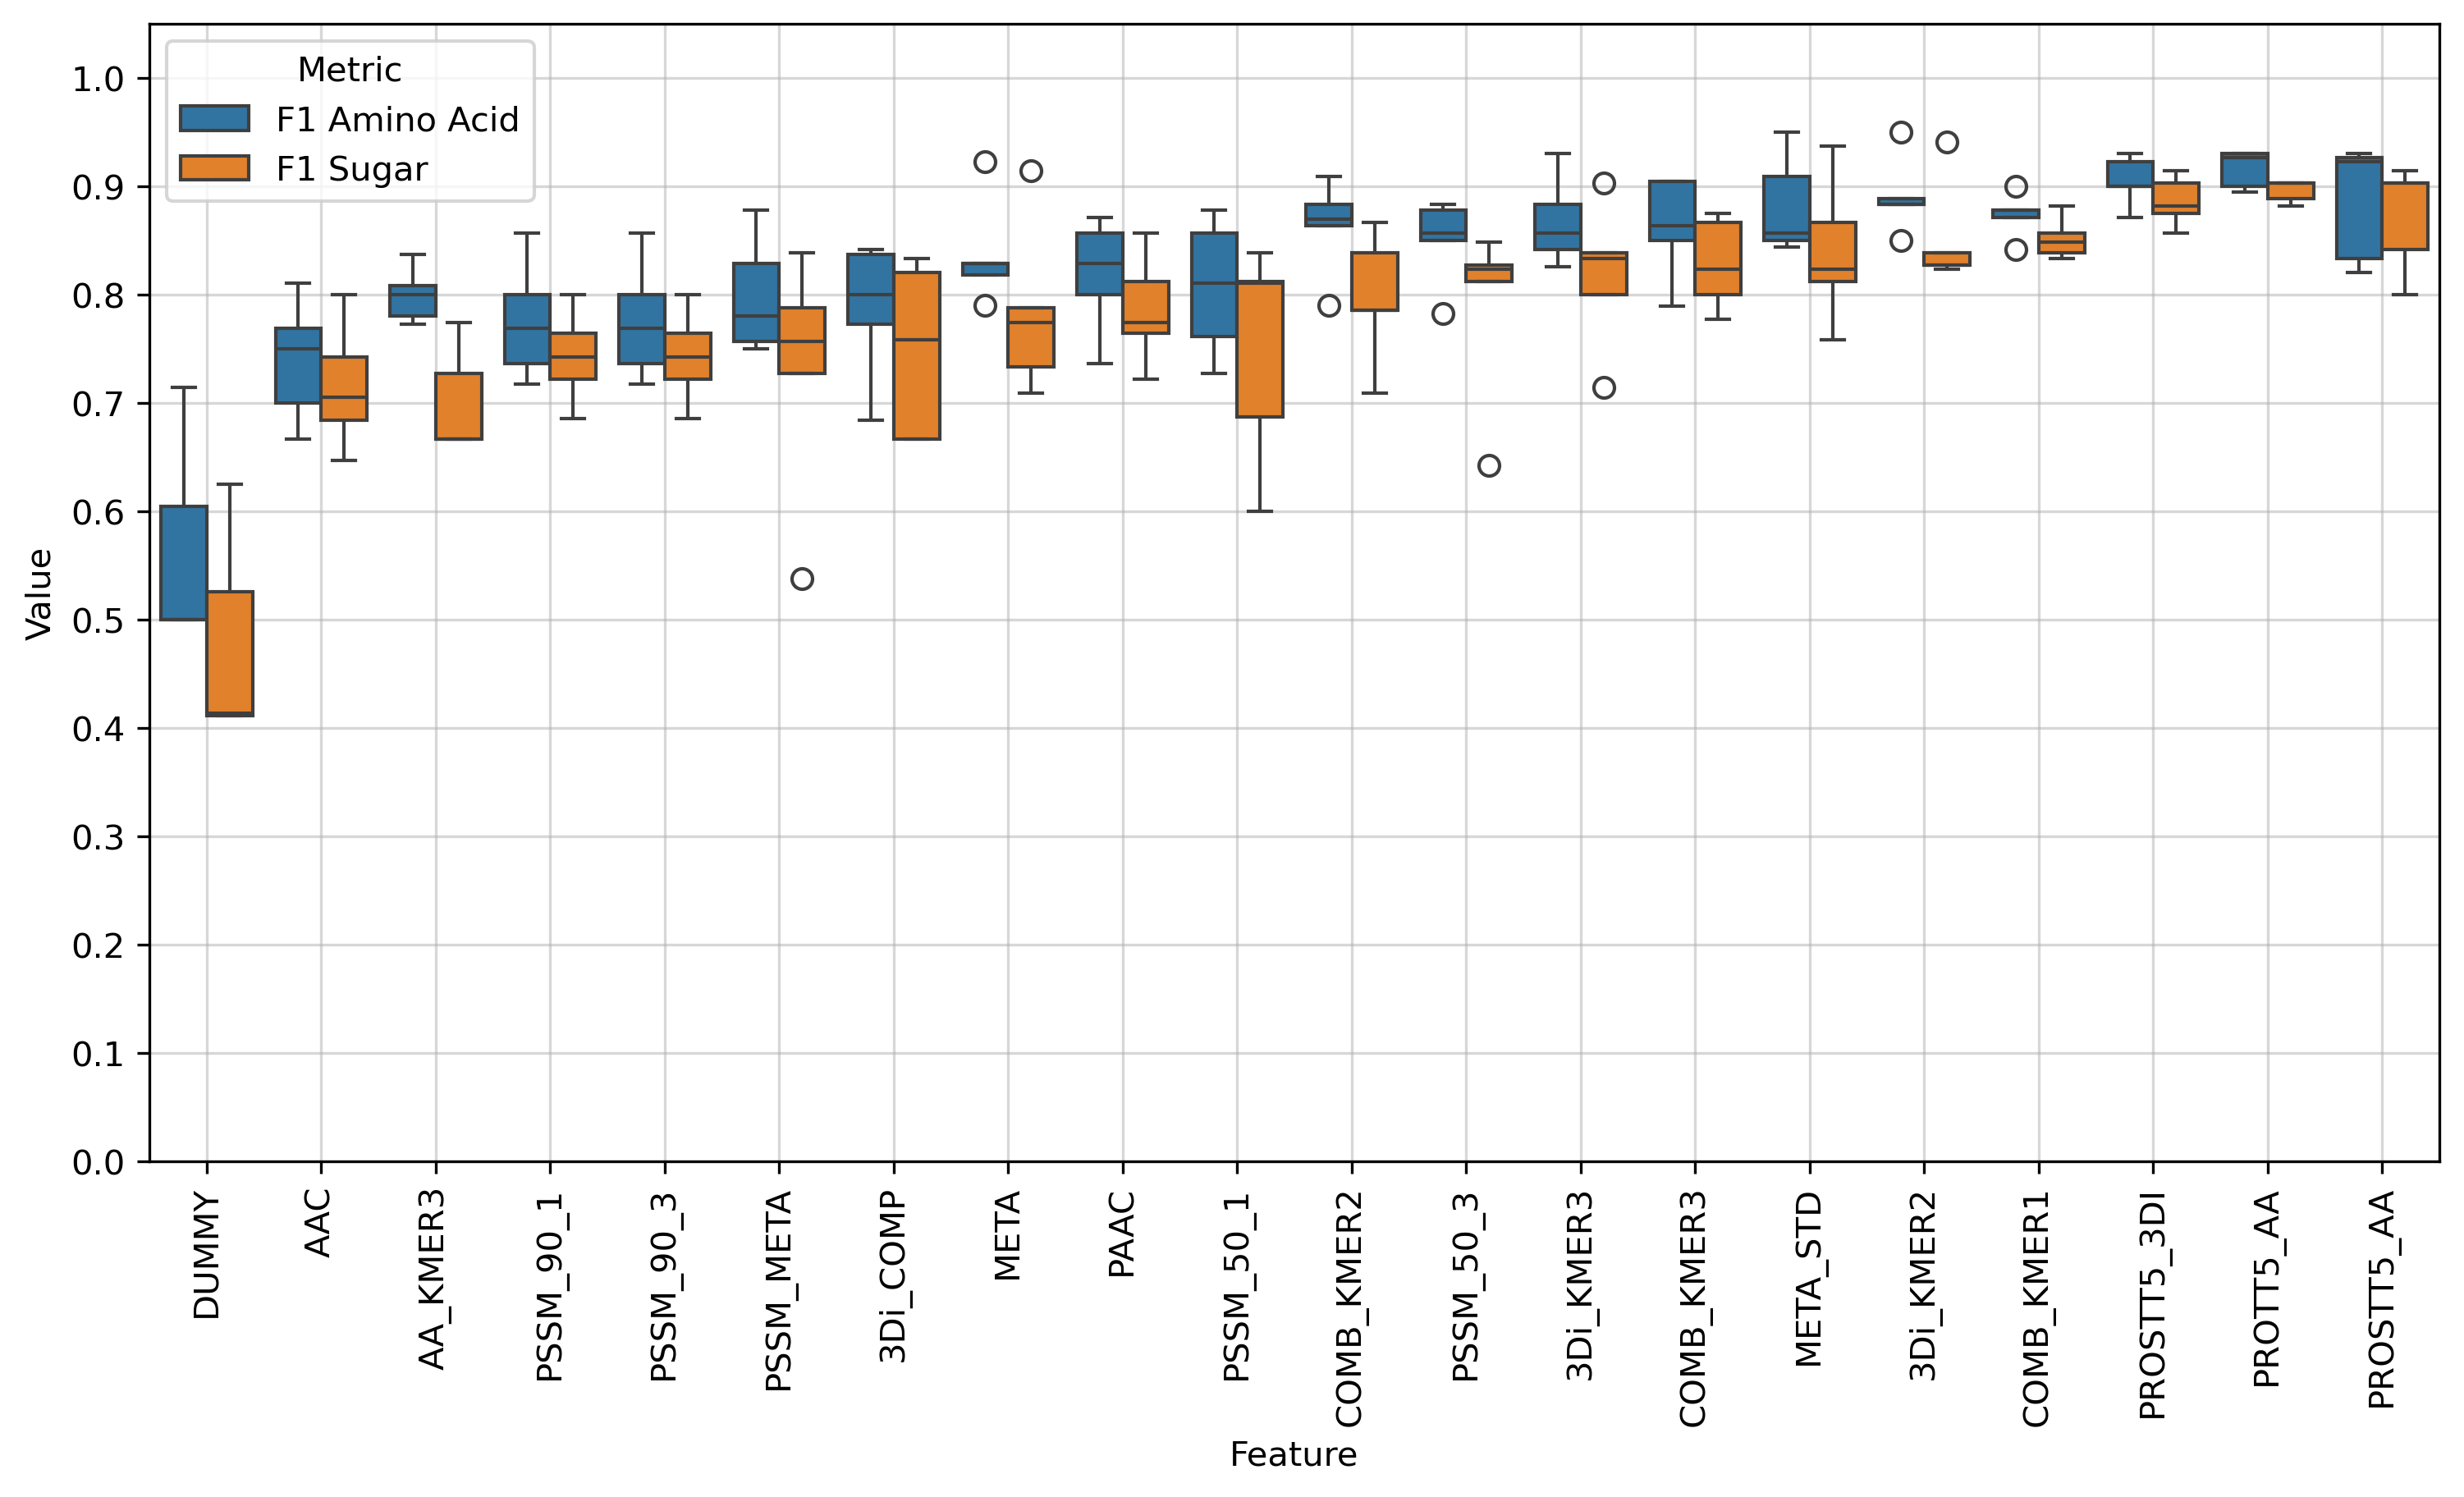

In [ ]:
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
    metrics_include = ["F1 Amino Acid","F1 Sugar"]
)

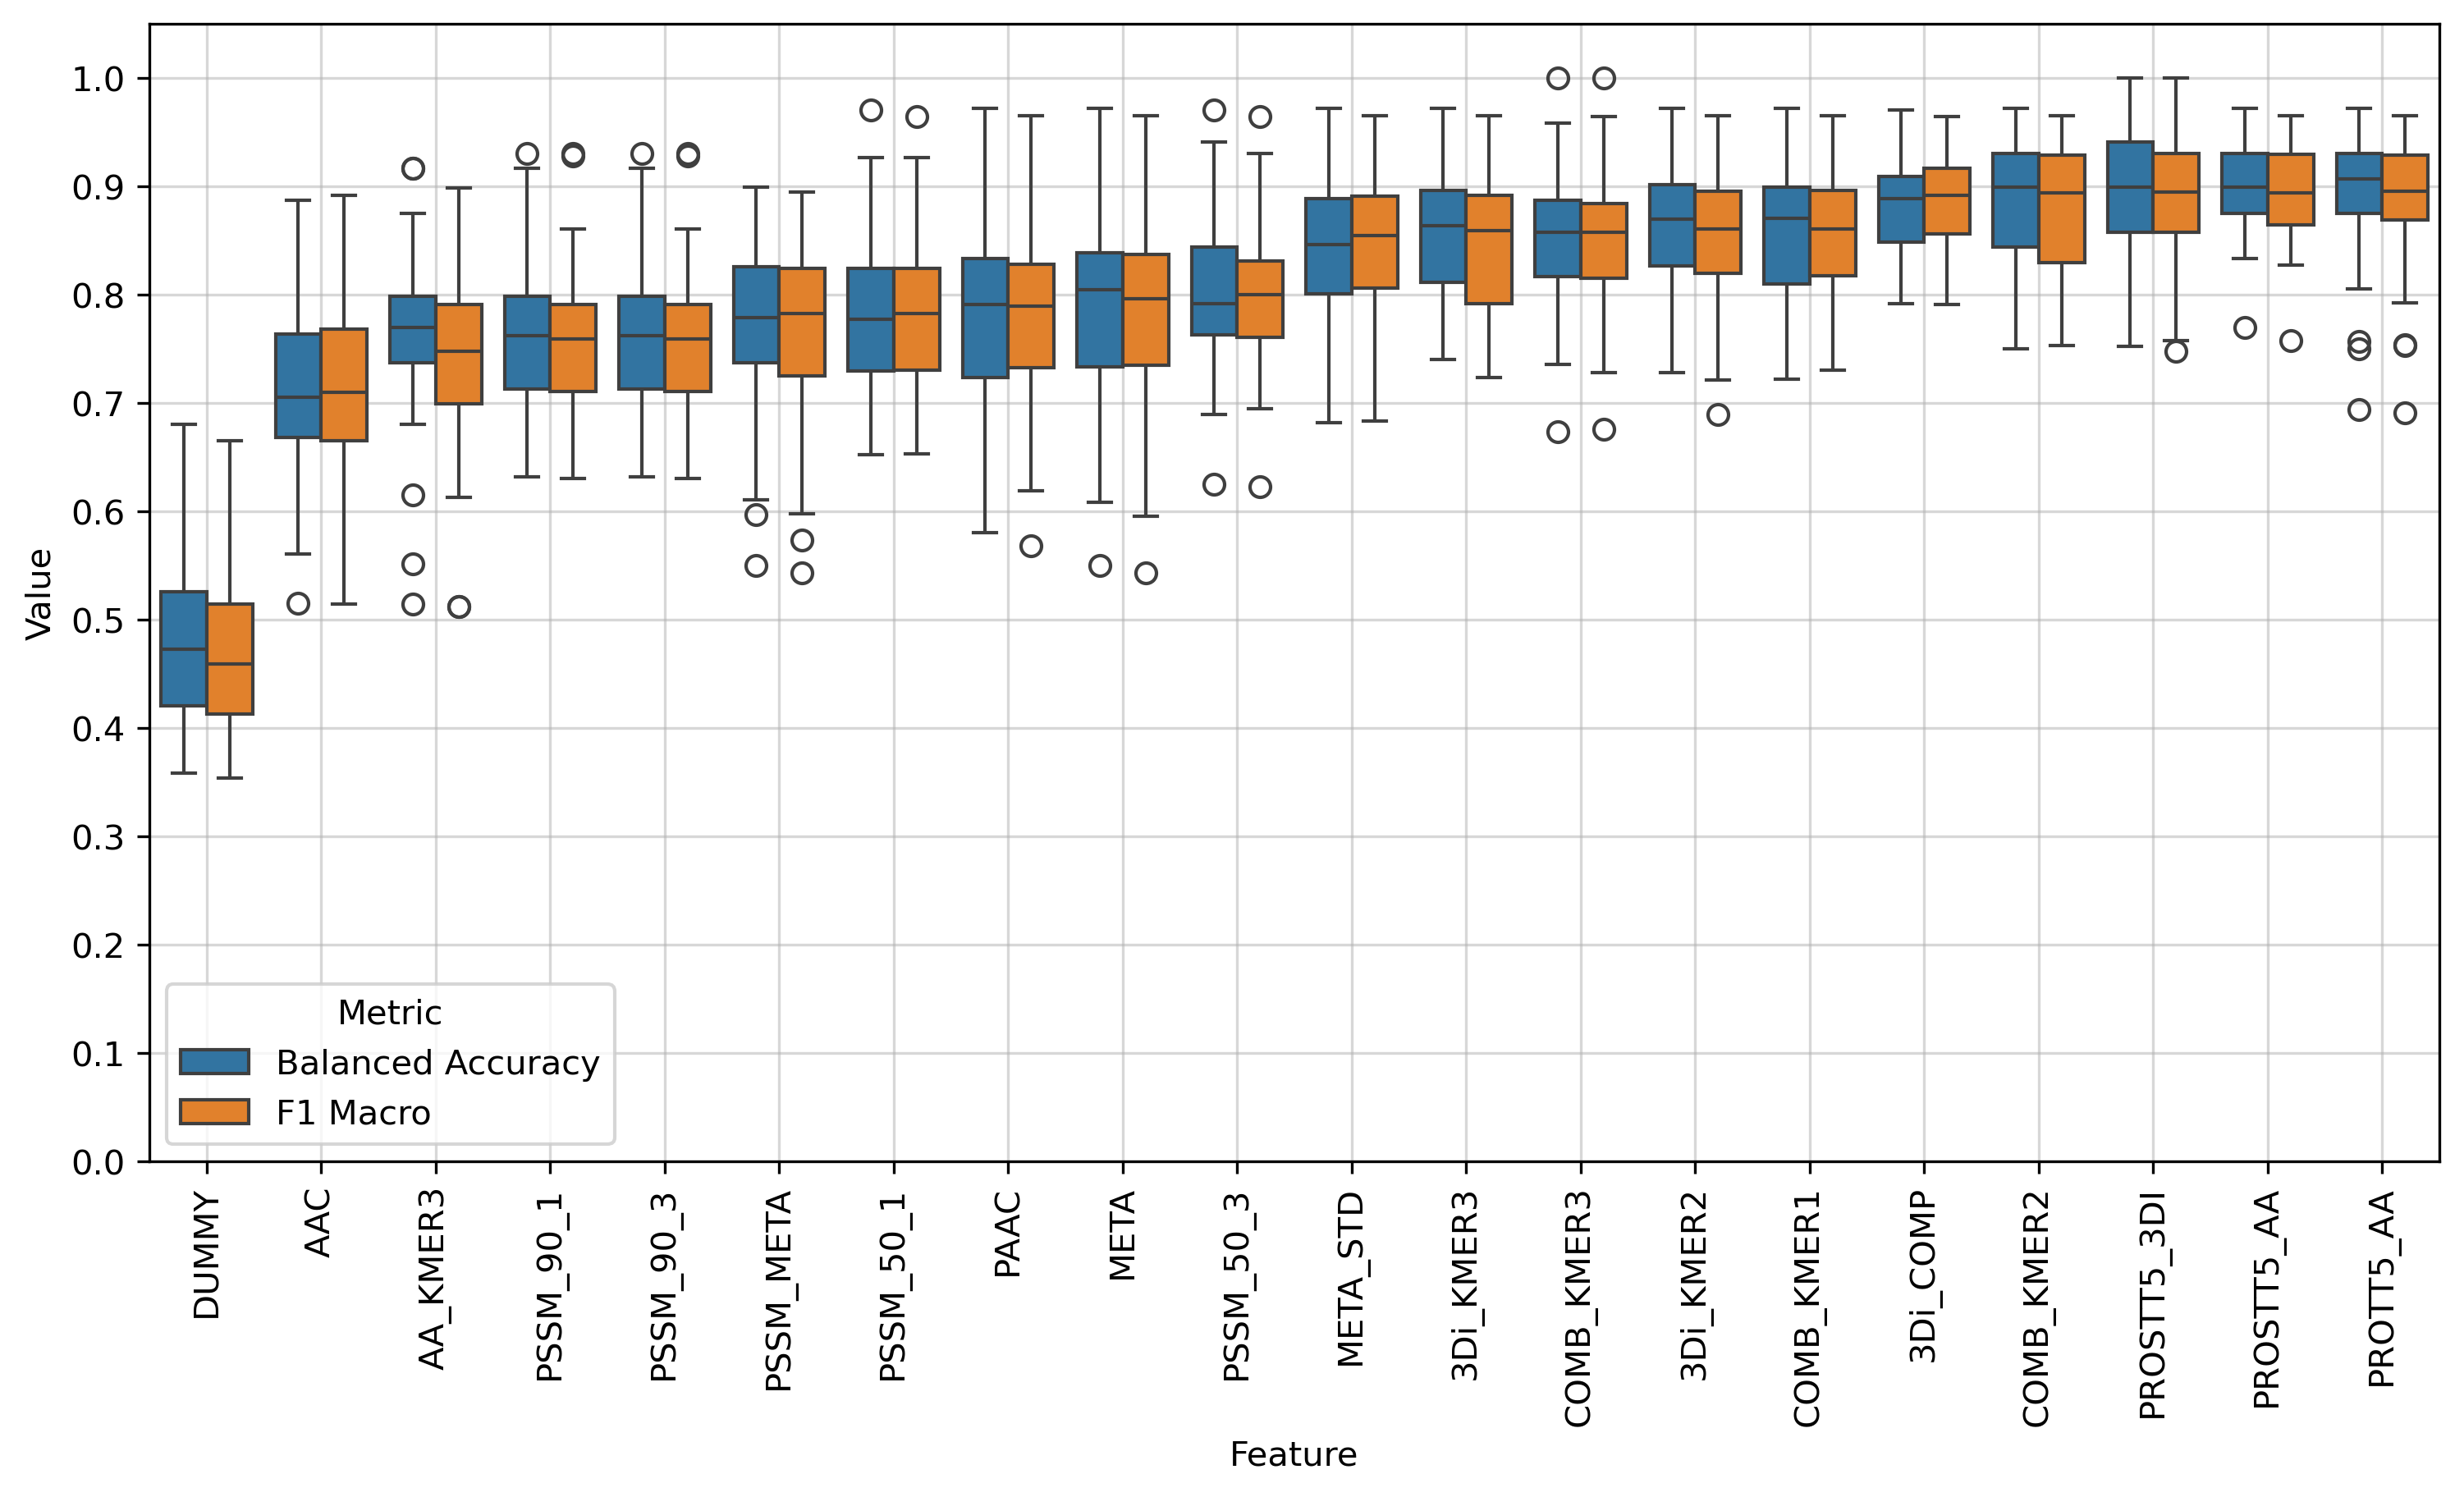

In [ ]:
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
    metrics_include = ["F1 Macro", "Balanced Accuracy"]
)